In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

In [19]:
clistfile = 'color_list.csv'
# change this
pic_file = 'lego.png'
pic_file = 'indiaflag.jpg'

#dont need to change these
repo_path = os.path.dirname(os.getcwd())
img_path = '/img'
testfile = repo_path + img_path + '/' + pic_file

In [20]:
# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

In [21]:
PATH = testfile

In [22]:
WIDTH = 128
HEIGHT = 128
CLUSTERS = 4

In [23]:
image = Image.open(PATH)

In [24]:
image.size

(960, 640)

In [25]:
print("Loaded {f} image. Size: {s:.2f} KB. Dimensions: ({d})".format(
        f=image.format, s=os.path.getsize(PATH) / 1024, d=image.size))

Loaded JPEG image. Size: 59.31 KB. Dimensions: ((960, 640))


In [26]:
def calculate_new_size(image):
    if image.width >= image.height:
        wpercent = (WIDTH / float(image.width))
        hsize = int((float(image.height) * float(wpercent)))
        new_width, new_height = WIDTH, hsize
    else:
        hpercent = (HEIGHT / float(image.height))
        wsize = int((float(image.width) * float(hpercent)))
        new_width, new_height = wsize, HEIGHT
    return new_width, new_height

In [27]:
calculate_new_size(image)

(128, 85)

In [28]:
new_width, new_height = calculate_new_size(image)

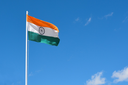

In [29]:
image.resize((new_width, new_height), Image.ANTIALIAS)

In [30]:
image = image.resize((new_width, new_height), Image.ANTIALIAS)

In [31]:
img_array = np.array(image)

In [32]:
img_vector = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))

In [33]:
model = KMeans(n_clusters=CLUSTERS)

In [34]:
labels = model.fit_predict(img_vector)

In [35]:
label_counts = Counter(labels)

In [36]:
total_count = sum(label_counts.values())

In [37]:
hex_colors = [
    rgb2hex(center) for center in model.cluster_centers_
]
hex_colors

['#2676ba', '#afbed3', '#d86118', '#408fd7']

In [38]:
list(zip(hex_colors, list(label_counts.values())))

[('#2676ba', 4658), ('#afbed3', 645), ('#d86118', 5396), ('#408fd7', 181)]

## This does not seem to work, because it shows that orange is the most dominant color at around 50% however the orange pixel count must be quite small

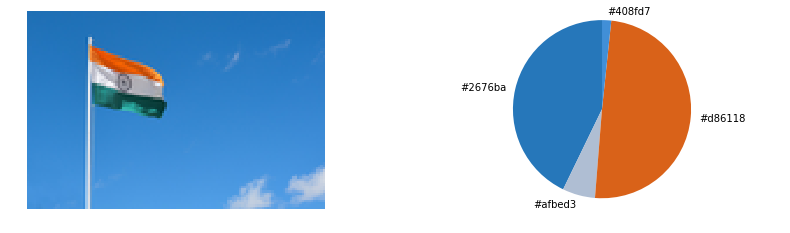

In [39]:
plt.figure(figsize=(14, 8))
plt.subplot(221)
plt.imshow(image)
plt.axis('off')

plt.subplot(222)
plt.pie(label_counts.values(), labels=hex_colors, colors=[color / 255 for color in model.cluster_centers_], startangle=90)
plt.axis('equal')
plt.show()